In [1]:
!pip install pandas

You should consider upgrading via the '/home/alessandro/.asdf/installs/python/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
import pandas
import time

dataset_a = pandas.read_csv('db-a.csv')
dataset_b = pandas.read_csv('db-b.csv')
dataset_c = pandas.read_csv('db-c.csv')

print(dataset_a)


   id   ano      departamento  salario
0   1  2023  Recursos Humanos    50000
1   2  2023            Vendas    60000
2   3  2023        Tecnologia    75000
3   4  2023         Marketing    55000
4   5  2023        Financeiro    70000
5   6  2023         Operações    48000
6   7  2023          Produção    52000


In [3]:
denial_constraint_violation = lambda t1, t2: t1['salario'] > t2['salario']

# resultado = dataset[(dataset['salario'] > 1000) & (dataset['departamento'] == 'A')]

In [4]:
def worst_method(dataset):
  tuples_qtd = dataset.shape[0]

  violations = []

  init_time = time.time()

  for t1_idx in range(tuples_qtd):
    for t2_idx in range(t1_idx, tuples_qtd):
      t1 = dataset.iloc[t1_idx]
      t2 = dataset.iloc[t2_idx]
      if denial_constraint_violation(t1, t2):
        violations.append((t1['id'], t2['id']))

  end_time = time.time()

  return end_time - init_time

In [5]:
def better_method(dataset):
  tuples_qtd = dataset.shape[0]
  
  violations = []

  init_time = time.time()

  for t1_idx in range(tuples_qtd):
    for t2_idx in range(t1_idx + 1, tuples_qtd):
      t1 = dataset.iloc[t1_idx]
      t2 = dataset.iloc[t2_idx]
      if denial_constraint_violation(t1, t2):
        violations.append((t1['id'], t2['id']))

  end_time = time.time()

  return end_time - init_time

In [6]:
datasets = [dataset_a, dataset_b, dataset_c]
methods = [better_method, worst_method]

results = [[], []]

for idx, dataset in enumerate(datasets):
  results[0].append(better_method(dataset))
  results[1].append(worst_method(dataset))

print(results)

[[0.013056755065917969, 0.047118186950683594, 6.07273006439209], [0.013804435729980469, 0.04697871208190918, 4.852703332901001]]


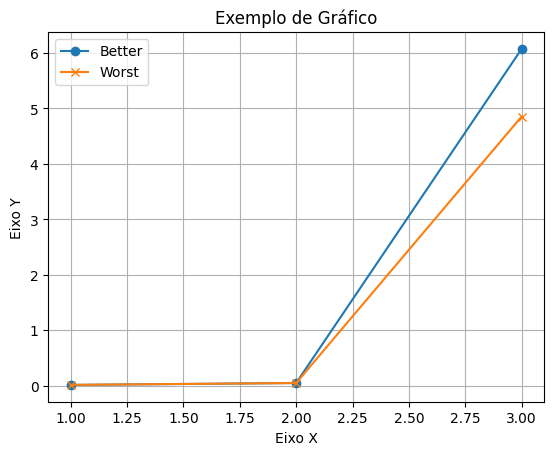

In [7]:
import matplotlib.pyplot as plt

x_indexes = [1, 2, 3]
plt.plot(x_indexes, results[0], marker='o', label='Better')
plt.plot(x_indexes, results[1], marker='x', label='Worst')
plt.title('Exemplo de Gráfico')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.legend()  # Mostra a legenda
plt.show()
